In [9]:
import pandas as pd
import os

In [ ]:
# merging 12 months of sales data into a single file

In [15]:
files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

 Read in updated dataframe

In [31]:
all_data = pd.read_csv("all_data.csv")

# clean up data

In [39]:
# Cleaning up nan's
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how="all")
all_data.head()

# Cleaning up or's
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

# change numbers to int

In [46]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

# Augment data with additional columns

In [65]:
# Add month column
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")

# Add sales column
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

# Add city column
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


What was the best month for sales? how much was earned that month?

In [50]:
results = all_data.groupby("Month").sum()

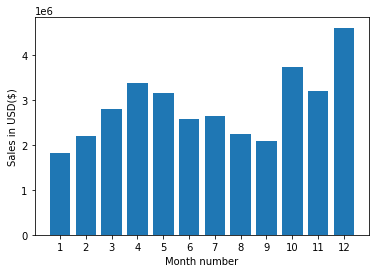

In [52]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Month number")
plt.show()


What city had the highest number of sales?

In [58]:
results = all_data.groupby("City").sum()
print(results)

                     Quantity Ordered    Price Each   Month         Sales
City                                                                     
 Atlanta (GA)                   16602  2.779908e+06  104794  2.795499e+06
 Austin (TX)                    11153  1.809874e+06   69829  1.819582e+06
 Boston (MA)                    22528  3.637410e+06  141112  3.661642e+06
 Dallas (TX)                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles (CA)               33289  5.421435e+06  208325  5.452571e+06
 New York City (NY)             27932  4.635371e+06  175741  4.664317e+06
 Portland (ME)                   2750  4.471893e+05   17144  4.497583e+05
 Portland (OR)                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco (CA)             50239  8.211462e+06  315520  8.262204e+06
 Seattle (WA)                   16553  2.733296e+06  104941  2.747755e+06


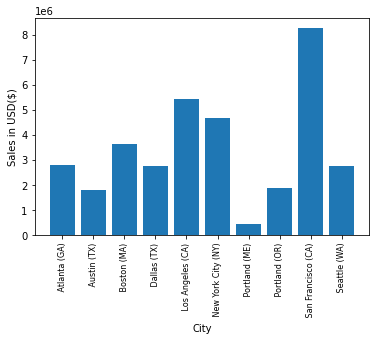

In [61]:
cities = [city for city, df in all_data.groupby("City")]
plt.bar(cities,results["Sales"])
plt.xticks(cities, rotation="vertical", size = 8)
plt.ylabel("Sales in USD($)")
plt.xlabel("City")
plt.show()

What time should we display advertisements to maximize likelihood of costumer buying product?

In [72]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [75]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


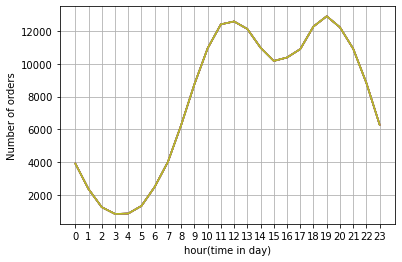

In [78]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.grid()
plt.ylabel("Number of orders")
plt.xlabel("hour(time in day)")
plt.show()

#my recommendations would be around 11am(11) and 7pm(19)
#maybe to do a chart for specific cities to advertise specificaly


What products are more often sold together?